Intially we had sepsis data with more than 11lakh rows and with lost of null values...
-->hence we removed the row which has less than 30 non-null values

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('C:\\Users\\shame\\Desktop\\sepsis_drop30.csv')

In [3]:
col=dataset.columns
print(col)

Index(['Unnamed: 0', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS',
       'SepsisLabel'],
      dtype='object')


In [4]:
df=pd.DataFrame(dataset)
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,340,71.5,99.5,37.4,178.0,114.5,87.0,28.0,NaN,7.0,...,28.4,4.9,NaN,92.0,51.06,1,NaN,NaN,17,0
1,478,77.5,100.0,NaN,148.5,92.5,71.0,12.0,NaN,4.0,...,29.4,8.3,NaN,232.0,24.39,1,NaN,NaN,4,0
2,609,105.0,100.0,37.3,112.0,76.0,57.0,19.0,NaN,-4.0,...,27.8,12.0,NaN,137.0,74.54,1,0.0,1.0,10,0
3,697,80.0,99.0,NaN,98.0,58.0,37.0,14.0,NaN,1.0,...,23.5,12.8,NaN,221.0,80.40,0,NaN,NaN,7,0
4,1089,82.0,98.0,NaN,130.5,85.0,67.0,18.0,NaN,-4.0,...,27.3,22.8,NaN,238.0,59.60,1,1.0,0.0,3,0


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

To remove nan values let us pass into KNN imputer

In [6]:
from sklearn.impute import KNNImputer
from numpy import isnan
data=df.values
ix=[i for i in range(data.shape[1]) if i!=40]
x,y=data[:,ix],data[:,39]
print('MISSING %d' % sum(isnan(x).flatten()))
imputer=KNNImputer()
imputer.fit(x)
xtrans=imputer.transform(x)
print('MISSING %d' % sum(isnan(xtrans).flatten()))

MISSING 51140
MISSING 0


In [7]:
print(xtrans)

[[ 71.5    99.5    37.4   ...   0.8    17.      0.   ]
 [ 77.5   100.     36.722 ...   0.8     4.      0.   ]
 [105.    100.     37.3   ...   1.     10.      0.   ]
 ...
 [ 91.    100.     33.45  ...   1.      7.      0.   ]
 [ 86.     93.5    36.5   ...   1.      2.      0.   ]
 [121.     92.     37.034 ...   1.      3.      0.   ]]


In [8]:
final=pd.DataFrame(data=xtrans,columns=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'ICULOS',
       'SepsisLabel'])
print(final.head())

      HR  O2Sat    Temp    SBP    MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
0   71.5   99.5  37.400  178.0  114.5  87.0  28.0   29.3         7.0  30.0   
1   77.5  100.0  36.722  148.5   92.5  71.0  12.0   36.8         4.0  28.0   
2  105.0  100.0  37.300  112.0   76.0  57.0  19.0   30.5        -4.0  20.0   
3   80.0   99.0  36.982   98.0   58.0  37.0  14.0   33.9         1.0  25.0   
4   82.0   98.0  36.964  130.5   85.0  67.0  18.0   35.6        -4.0  21.0   

   ...   PTT   WBC  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  \
0  ...  28.4   4.9       213.4       92.0  51.06     1.0    0.2    0.8   
1  ...  29.4   8.3       280.4      232.0  24.39     1.0    0.2    0.8   
2  ...  27.8  12.0       295.6      137.0  74.54     1.0    0.0    1.0   
3  ...  23.5  12.8       293.8      221.0  80.40     0.0    0.2    0.8   
4  ...  27.3  22.8       203.2      238.0  59.60     1.0    1.0    0.0   

   ICULOS  SepsisLabel  
0    17.0          0.0  
1     4.0          0.0  
2    10.0  

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
print(final.where(final<0).count())

HR                     0
O2Sat                  0
Temp                   0
SBP                    0
MAP                    0
DBP                    0
Resp                   0
EtCO2                  0
BaseExcess          2777
HCO3                   0
FiO2                   0
pH                     0
PaCO2                  0
SaO2                   0
AST                    0
BUN                    0
Alkalinephos           0
Calcium                0
Chloride               0
Creatinine             0
Bilirubin_direct       0
Glucose                0
Lactate                0
Magnesium              0
Phosphate              0
Potassium              0
Bilirubin_total        0
TroponinI              0
Hct                    0
Hgb                    0
PTT                    0
WBC                    0
Fibrinogen             0
Platelets              0
Age                    0
Gender                 0
Unit1                  0
Unit2                  0
ICULOS                 0
SepsisLabel            0


In [11]:
final.drop("BaseExcess",axis=1,inplace=True)

In [12]:
print(final.where(final<0).count())

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
ICULOS              0
SepsisLabel         0
dtype: int64


In [13]:
X=final.iloc[:,0:37]
y=final.iloc[:,-1]
print(X)

         HR  O2Sat    Temp    SBP    MAP   DBP  Resp  EtCO2  HCO3   FiO2  ...  \
0      71.5   99.5  37.400  178.0  114.5  87.0  28.0   29.3  30.0  0.500  ...   
1      77.5  100.0  36.722  148.5   92.5  71.0  12.0   36.8  28.0  0.400  ...   
2     105.0  100.0  37.300  112.0   76.0  57.0  19.0   30.5  20.0  0.580  ...   
3      80.0   99.0  36.982   98.0   58.0  37.0  14.0   33.9  25.0  0.566  ...   
4      82.0   98.0  36.964  130.5   85.0  67.0  18.0   35.6  21.0  0.500  ...   
...     ...    ...     ...    ...    ...   ...   ...    ...   ...    ...  ...   
5970   91.0   97.0  36.000  114.0   88.0  73.0  27.0   25.0  19.8  1.000  ...   
5971   78.0   92.0  37.250  118.0   90.0  74.0  24.0   18.0  22.4  0.850  ...   
5972   91.0  100.0  33.450  125.0   89.5  74.5  12.0   30.1  22.2  1.000  ...   
5973   86.0   93.5  36.500  135.0   86.0  64.0  15.0   35.2  27.2  0.600  ...   
5974  121.0   92.0  37.034   93.0   66.0  51.0  35.0   29.3  21.6  0.280  ...   

       Hct   Hgb    PTT   W

selectKBest for feature selection

In [14]:
bestfeatures=SelectKBest(score_func=chi2,k=15)
fit=bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(X.columns)
featureScore=pd.concat([dfcol,dfscores],axis=1)
featureScore.columns=['Title','Score']
print(featureScore.nlargest(15,'Score'))

              Title        Score
31       Fibrinogen  1968.677811
14              BUN   546.859690
32        Platelets   508.581713
15     Alkalinephos   456.873344
29              PTT    98.219382
3               SBP    52.011310
13              AST    49.127598
25  Bilirubin_total    42.597172
18       Creatinine    41.043881
6              Resp    30.468142
30              WBC    28.964834
20          Glucose    28.248489
0                HR    24.015329
4               MAP    19.996834
26        TroponinI    14.158456


feature importance

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt 
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.02736337 0.02976117 0.02970432 0.02696343 0.02835209 0.02561583
 0.02630783 0.02839419 0.02919286 0.02853321 0.026791   0.02736016
 0.02845772 0.02572277 0.02898957 0.02699384 0.03326275 0.02976931
 0.03161707 0.02878164 0.02856327 0.02342397 0.02356898 0.02649522
 0.02581463 0.03135703 0.02475328 0.02508019 0.02818647 0.02912074
 0.02806862 0.03812553 0.03225243 0.02645015 0.01415843 0.01296015
 0.01368675]


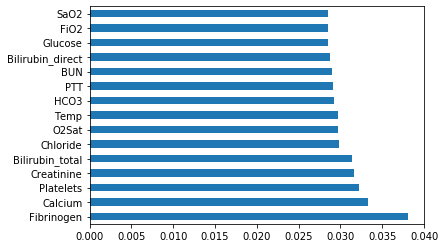

In [17]:
important=pd.Series(model.feature_importances_,index=X.columns)
important.nlargest(15).plot(kind='barh')
plt.show()

using Heatmap

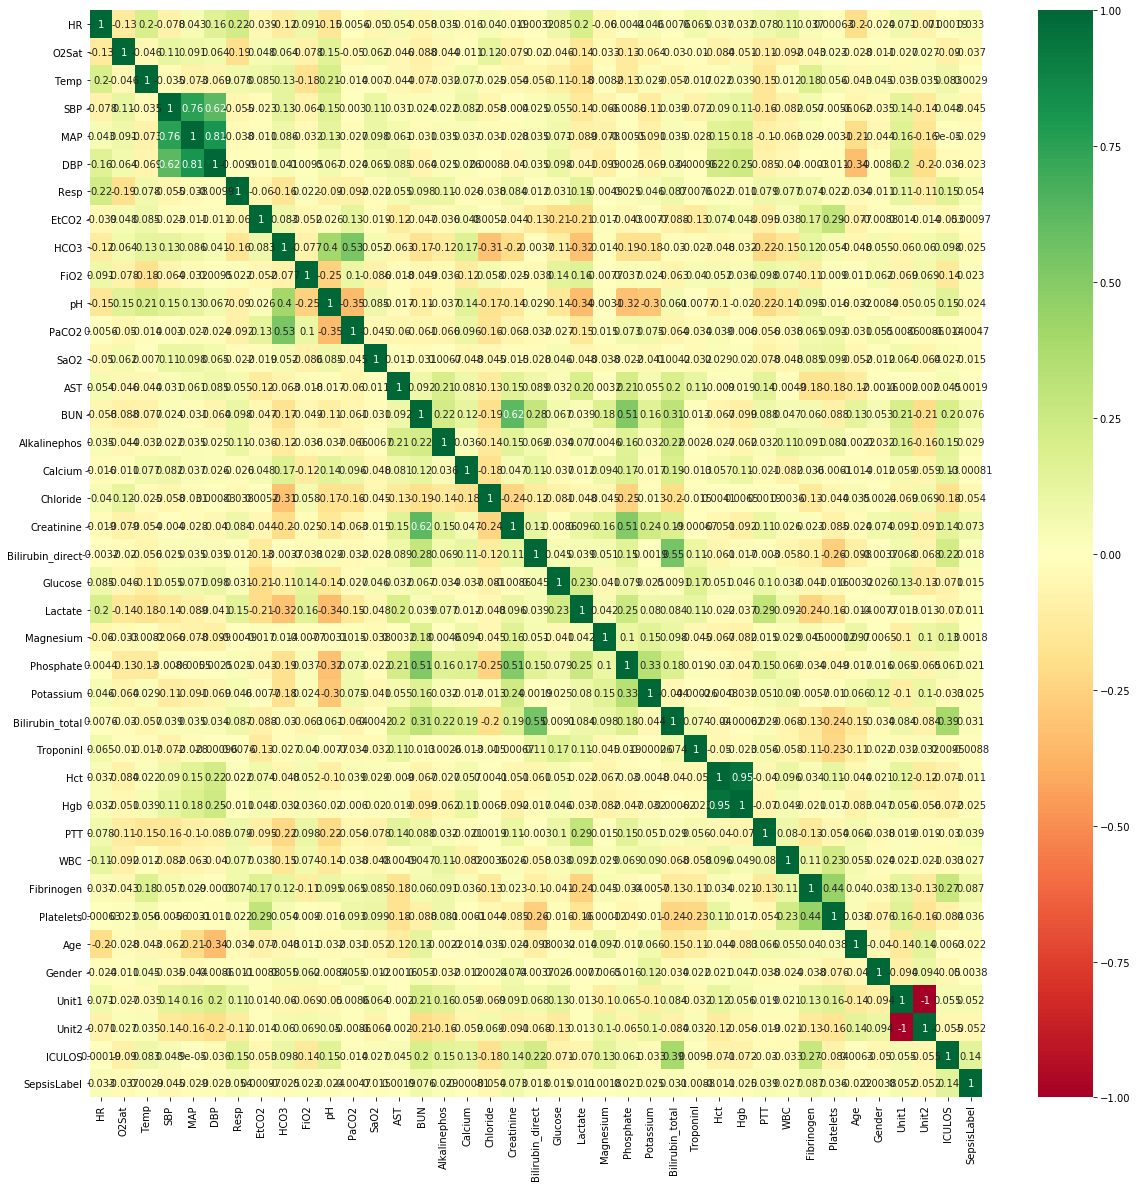

In [18]:
import seaborn as sns
corrmat=final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
corr_feat = corrmat['SepsisLabel']
print(corr_feat)
for i in corr_feat:
    if i >= 0.5:
        print(i)

HR                  0.032758
O2Sat              -0.036555
Temp                0.002926
SBP                -0.044848
MAP                -0.029283
DBP                -0.023454
Resp                0.054371
EtCO2               0.000970
HCO3               -0.024897
FiO2                0.023429
pH                 -0.023865
PaCO2              -0.004670
SaO2               -0.014986
AST                 0.001896
BUN                 0.076117
Alkalinephos        0.029149
Calcium            -0.000807
Chloride           -0.053894
Creatinine          0.072674
Bilirubin_direct    0.018046
Glucose             0.014833
Lactate             0.010968
Magnesium           0.001778
Phosphate           0.021043
Potassium           0.024545
Bilirubin_total     0.031176
TroponinI          -0.008767
Hct                -0.010648
Hgb                -0.025348
PTT                 0.039266
WBC                 0.027274
Fibrinogen          0.086729
Platelets           0.036426
Age                -0.021992
Gender        

In [20]:

dup=final[['O2Sat', 'Temp', 'SBP','EtCO2','HCO3','SaO2','BUN','PTT',
       'Alkalinephos', 'Calcium','Chloride','Creatinine','Glucose','Bilirubin_total','WBC',
       'Fibrinogen', 'Platelets','SepsisLabel']]

fresh=pd.DataFrame(dup)
print(fresh.head())

   O2Sat    Temp    SBP  EtCO2  HCO3   SaO2   BUN   PTT  Alkalinephos  \
0   99.5  37.400  178.0   29.3  30.0  93.38  24.0  28.4          54.0   
1  100.0  36.722  148.5   36.8  28.0  99.00   7.0  29.4          87.6   
2  100.0  37.300  112.0   30.5  20.0  97.00  16.0  27.8          59.6   
3   99.0  36.982   98.0   33.9  25.0  97.40  12.0  23.5          67.0   
4   98.0  36.964  130.5   35.6  21.0  92.80  79.0  27.3          87.0   

   Calcium  Chloride  Creatinine  Glucose  Bilirubin_total   WBC  Fibrinogen  \
0     8.90     105.0         0.9     96.5             2.10   4.9       213.4   
1     9.10     102.0         0.8    141.0             2.64   8.3       280.4   
2     8.42     113.0         1.1    114.0             1.80  12.0       295.6   
3     8.80     107.0         0.6    138.0             1.60  12.8       293.8   
4    11.00     104.0        10.8     56.5             0.40  22.8       203.2   

   Platelets  SepsisLabel  
0       92.0          0.0  
1      232.0          0.

In [21]:
fresh.to_csv('C:\\Users\\shame\\Desktop\\Sepsis_final.csv')

---------------------------------------------------------------------------------------------------

Ater feature Selection----> model applied


In [22]:
import numpy as np 
import pandas as pd 

In [23]:
data = pd.read_csv('C:\\Users\\shame\\Desktop\\Sepsis_final.csv')

In [24]:
data.head()

,Unnamed: 0,O2Sat,Temp,SBP,EtCO2,HCO3,SaO2,BUN,PTT,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Bilirubin_total,WBC,Fibrinogen,Platelets,SepsisLabel
0,0,99.5,37.400,178.0,29.3,30.0,93.38,24.0,28.4,54.0,8.90,105.0,0.9,96.5,2.10,4.9,213.4,92.0,0.0
1,1,100.0,36.722,148.5,36.8,28.0,99.00,7.0,29.4,87.6,9.10,102.0,0.8,141.0,2.64,8.3,280.4,232.0,0.0
2,2,100.0,37.300,112.0,30.5,20.0,97.00,16.0,27.8,59.6,8.42,113.0,1.1,114.0,1.80,12.0,295.6,137.0,0.0
3,3,99.0,36.982,98.0,33.9,25.0,97.40,12.0,23.5,67.0,8.80,107.0,0.6,138.0,1.60,12.8,293.8,221.0,0.0
4,4,98.0,36.964,130.5,35.6,21.0,92.80,79.0,27.3,87.0,11.00,104.0,10.8,56.5,0.40,22.8,203.2,238.0,0.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5975 non-null   int64  
 1   O2Sat            5975 non-null   float64
 2   Temp             5975 non-null   float64
 3   SBP              5975 non-null   float64
 4   EtCO2            5975 non-null   float64
 5   HCO3             5975 non-null   float64
 6   SaO2             5975 non-null   float64
 7   BUN              5975 non-null   float64
 8   PTT              5975 non-null   float64
 9   Alkalinephos     5975 non-null   float64
 10  Calcium          5975 non-null   float64
 11  Chloride         5975 non-null   float64
 12  Creatinine       5975 non-null   float64
 13  Glucose          5975 non-null   float64
 14  Bilirubin_total  5975 non-null   float64
 15  WBC              5975 non-null   float64
 16  Fibrinogen       5975 non-null   float64
 17  Platelets     

Text(0, 0.5, 'Count')

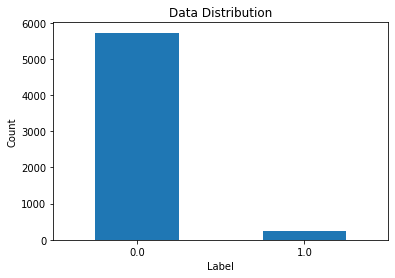

In [26]:
import matplotlib.pyplot as plt
count_label = pd.value_counts(data['SepsisLabel'] , sort = True)
count_label.plot(kind = 'bar', rot = 0)
plt.title('Data Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

In [27]:
label_0 = data[ data['SepsisLabel'] == 0 ]
label_1 = data[ data['SepsisLabel'] == 1 ]
print(label_0.shape, label_1.shape)

(5723, 19) (252, 19)


In [28]:
X = data.drop('SepsisLabel',axis = 1).values 
y = data['SepsisLabel'].values 

In [29]:
X = X[:, 1:]
print(X)

[[ 99.5    37.4   178.    ...   4.9   213.4    92.   ]
 [100.     36.722 148.5   ...   8.3   280.4   232.   ]
 [100.     37.3   112.    ...  12.    295.6   137.   ]
 ...
 [100.     33.45  125.    ...  16.6   159.    105.   ]
 [ 93.5    36.5   135.    ...  10.2   337.8   237.   ]
 [ 92.     37.034  93.    ...   5.8   382.4   355.   ]]


In [30]:
from imblearn.under_sampling import NearMiss 
nm = NearMiss()
X_res, y_res = nm.fit_sample(X,y)

In [31]:
X_res.shape , y_res.shape

((504, 17), (504,))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8118811881188119

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
AdaBmodel = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model = AdaBmodel.fit(X_train, y_train)
model.score(X_test,y_test)

0.8514851485148515

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)#doubt 
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8613861386138614

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=0) 
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8910891089108911

In [37]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8712871287128713

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7821782178217822

In [39]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8811881188118812

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
lam = [0.001,0.01,0.1,1,10]
clf = LogisticRegression()
param_grid = {'C':lam}
grid = GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 5,n_jobs = 3)
grid.fit(X_train, y_train)
print("best C = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
a = grid.best_params_

best C =  {'C': 1}
Accuracy on train data =  84.34876543209876


In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
lam = [0.001,0.01,0.1,1,10]
clf = XGBClassifier()
param_grid = {'C':lam}
grid = GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 5,n_jobs = 3)
grid.fit(X_train, y_train)
print("best C = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
a = grid.best_params_

[11:49:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { C } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


best C =  {'C': 0.001}
Accuracy on train data =  87.09567901234567


In [42]:
lam = [0.001,0.01,0.1,1,10]
clf = LogisticRegression(class_weight ='balanced')
param_grid = {'C':lam}
grid = GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 5,n_jobs = 3)
grid.fit(X_train, y_train)
print("best C = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
a = grid.best_params_
optimal_a1 = a.get('C')

best C =  {'C': 1}
Accuracy on train data =  84.34567901234567


In [43]:
params = { 
"learning_rate" :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
"max_depth" :[3, 4, 5, 6, 8, 10, 12, 15], 
"min_child_weight" :[1, 3, 5, 7], 
"gamma" :[0.0, 0.1, 0.2, 0.3, 0.4], 
"colsample_bytree" :[0.3, 0.4, 0.5, 0.7]
}

In [44]:
model = XGBClassifier()
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    4.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.4s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [45]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [46]:
print("Accuracy on train data = ", random_search.best_score_*100)

Accuracy on train data =  94.11250000000001
